## SVM


Scale'e duyarlıdır scale edilmesi gerekir.

Binary classification problemlerini çözer.
amaç iki sinif arasındaki ayrımın optimum olmasını sağlayacak hiper düzlemi bulmaktır
Amacımız margini geniş tutmak
Hard marginde veriler doğrusal olarak ayrılabiliyorsa çalışır ve aykırı değerlere karşı duyarlıdır.
Soft Marginde veriler dağınıksa ve bir hiper düzlem ile ayrılamıyorsa verilerin çzigiyi ihmal etmesine izin verilir.
İkisi arasındaki dengeyi C parametresi ile sağlıyoruz. C ne kadar büyükse margin o kadar dardır.Dolayısıyla overiftte C
yi azaltmamız gerekir.

Kernel Hilesi
Düşük boyutlar karmaşık veri setlerini açıklamada yeterli olmayabilir. Boyutu arttırsak işlemler artacağı için çok uzun sürer. İşte Kernel Trick burada devreye giriyor. Elimizdeki koordinatları belirli Kernel Fonksiyonları ile çarparak çok daha anlamlı hale getirebiliyoruz.

1) Polynomial Kernel

2 boyuttan çıkıp 3 veya daha fazla boyutta işlem yapıyormuşuz gibi hareket ediyoruz.
Modelimiz overfit olmuşsa derecesini düşürmeniz, underfit olmuşsa derecesini yükseltmeniz gerekir. Ayrıca coef0 hiperparametresiyle modelinizin yüksek dereceli denklemlerden ne kadar etkileneceğini ayarlayabilirsiniz(sadece ‘poly’ ve ‘sigmoid’ kernelda etkili olur).

2) Gaussian Radial Basis Function Kernel

sonsuz boyuttaki Destek Vektör Makinelerini bulur ve her bir noktanın belirli bir noktaya ne kadar benzediğini normal dağılım ile hesaplar, ona göre sınıflandırır. Dağılımın genişliğini gamma hiperparametresi ile kontrol ederiz. Gamma ne kadar küçükse dağılım o kadar geniş olur. C hiperparametresindeki gibi, model overfit olmuşsa gamma değerini düşürmemiz, model underfit olmuşsa gamma değerini yükseltmemiz gerekir.


bf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])
rbf_kernel_svm_clf.fit(X, y)
This model is represented on the bottom left of Figure 5-9. The other plots show
models trained with different values of hyperparameters gamma (γ) and C. Increasing
gamma makes the bell-shape curve narrower (see the left plot of Figure 5-8), and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influ‐
ence, and the decision boundary ends up smoother. So γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐
fitting, you should increase it (similar to the C hyperparameter).

Data eğitmede yavaş kalabiliyor
from sklearn.kernel_aapproximation import Nystroem
ile hızlandırma şansımız var

Fazla feature az data da LinearSVC, Logistic
az feature ortda data da rbf
az feature çokdata da LinearSVC, kernel app.


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ])
svm_clf.fit(X, y)
#Then, as usual, you can use the model to make predictions:
svm_clf.predict([[5.5, 1.7]])
#array([1.])

array([1.])

Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it
is much slower, especially with large training sets, so it is not recommended. Another
option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core train‐
ing), or to handle online classification tasks.

The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler. Moreover, make sure
you set the loss hyperparameter to "hinge", as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances (we will discuss duality later in the chapter).


In [ ]:
# polynomial svm classification
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)



In [ ]:
Another
option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core train‐
ing), or to handle online classification tasks.

##### Time Complexity
 LinearSVC O(m*n)
 The algorithm takes longer if you require a very high precision
 Do not support kernel trick
 
 SVC O(m^2*n) to O(m^3*n)
 Perfect for complex but small or medium datasets
 SGDC Classifier O(m*n)
 

### SVM Regression
  
  LinearSVR ve normal svr ile kullnailabilir
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg = LinearSVR(epsilon=1.5)



In [ ]:
hinge loss 1 e kadar lineer düşüş, sonra 0 dan devam ediyor. margini de geçip sınıflandırabiliyorsak
loss functioın 0 alıyor.
kare alınca squared hinge(how bad?) oluyor. Orada sonuçlar daha kötü gidebilir hinge de amaç  0 ve 1 gibi düşünülebilir 

#### SGDC

This classifier has the advantage of being capable of handling very large datasets efficiently


##### Example


## Part 1: Setup

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [4]:
data=pd.read_csv("Wine_Quality_Data.csv")

In [6]:
y=(data['color']=='red').astype(int)
fields=list(data.columns[::-1])
correlations=data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

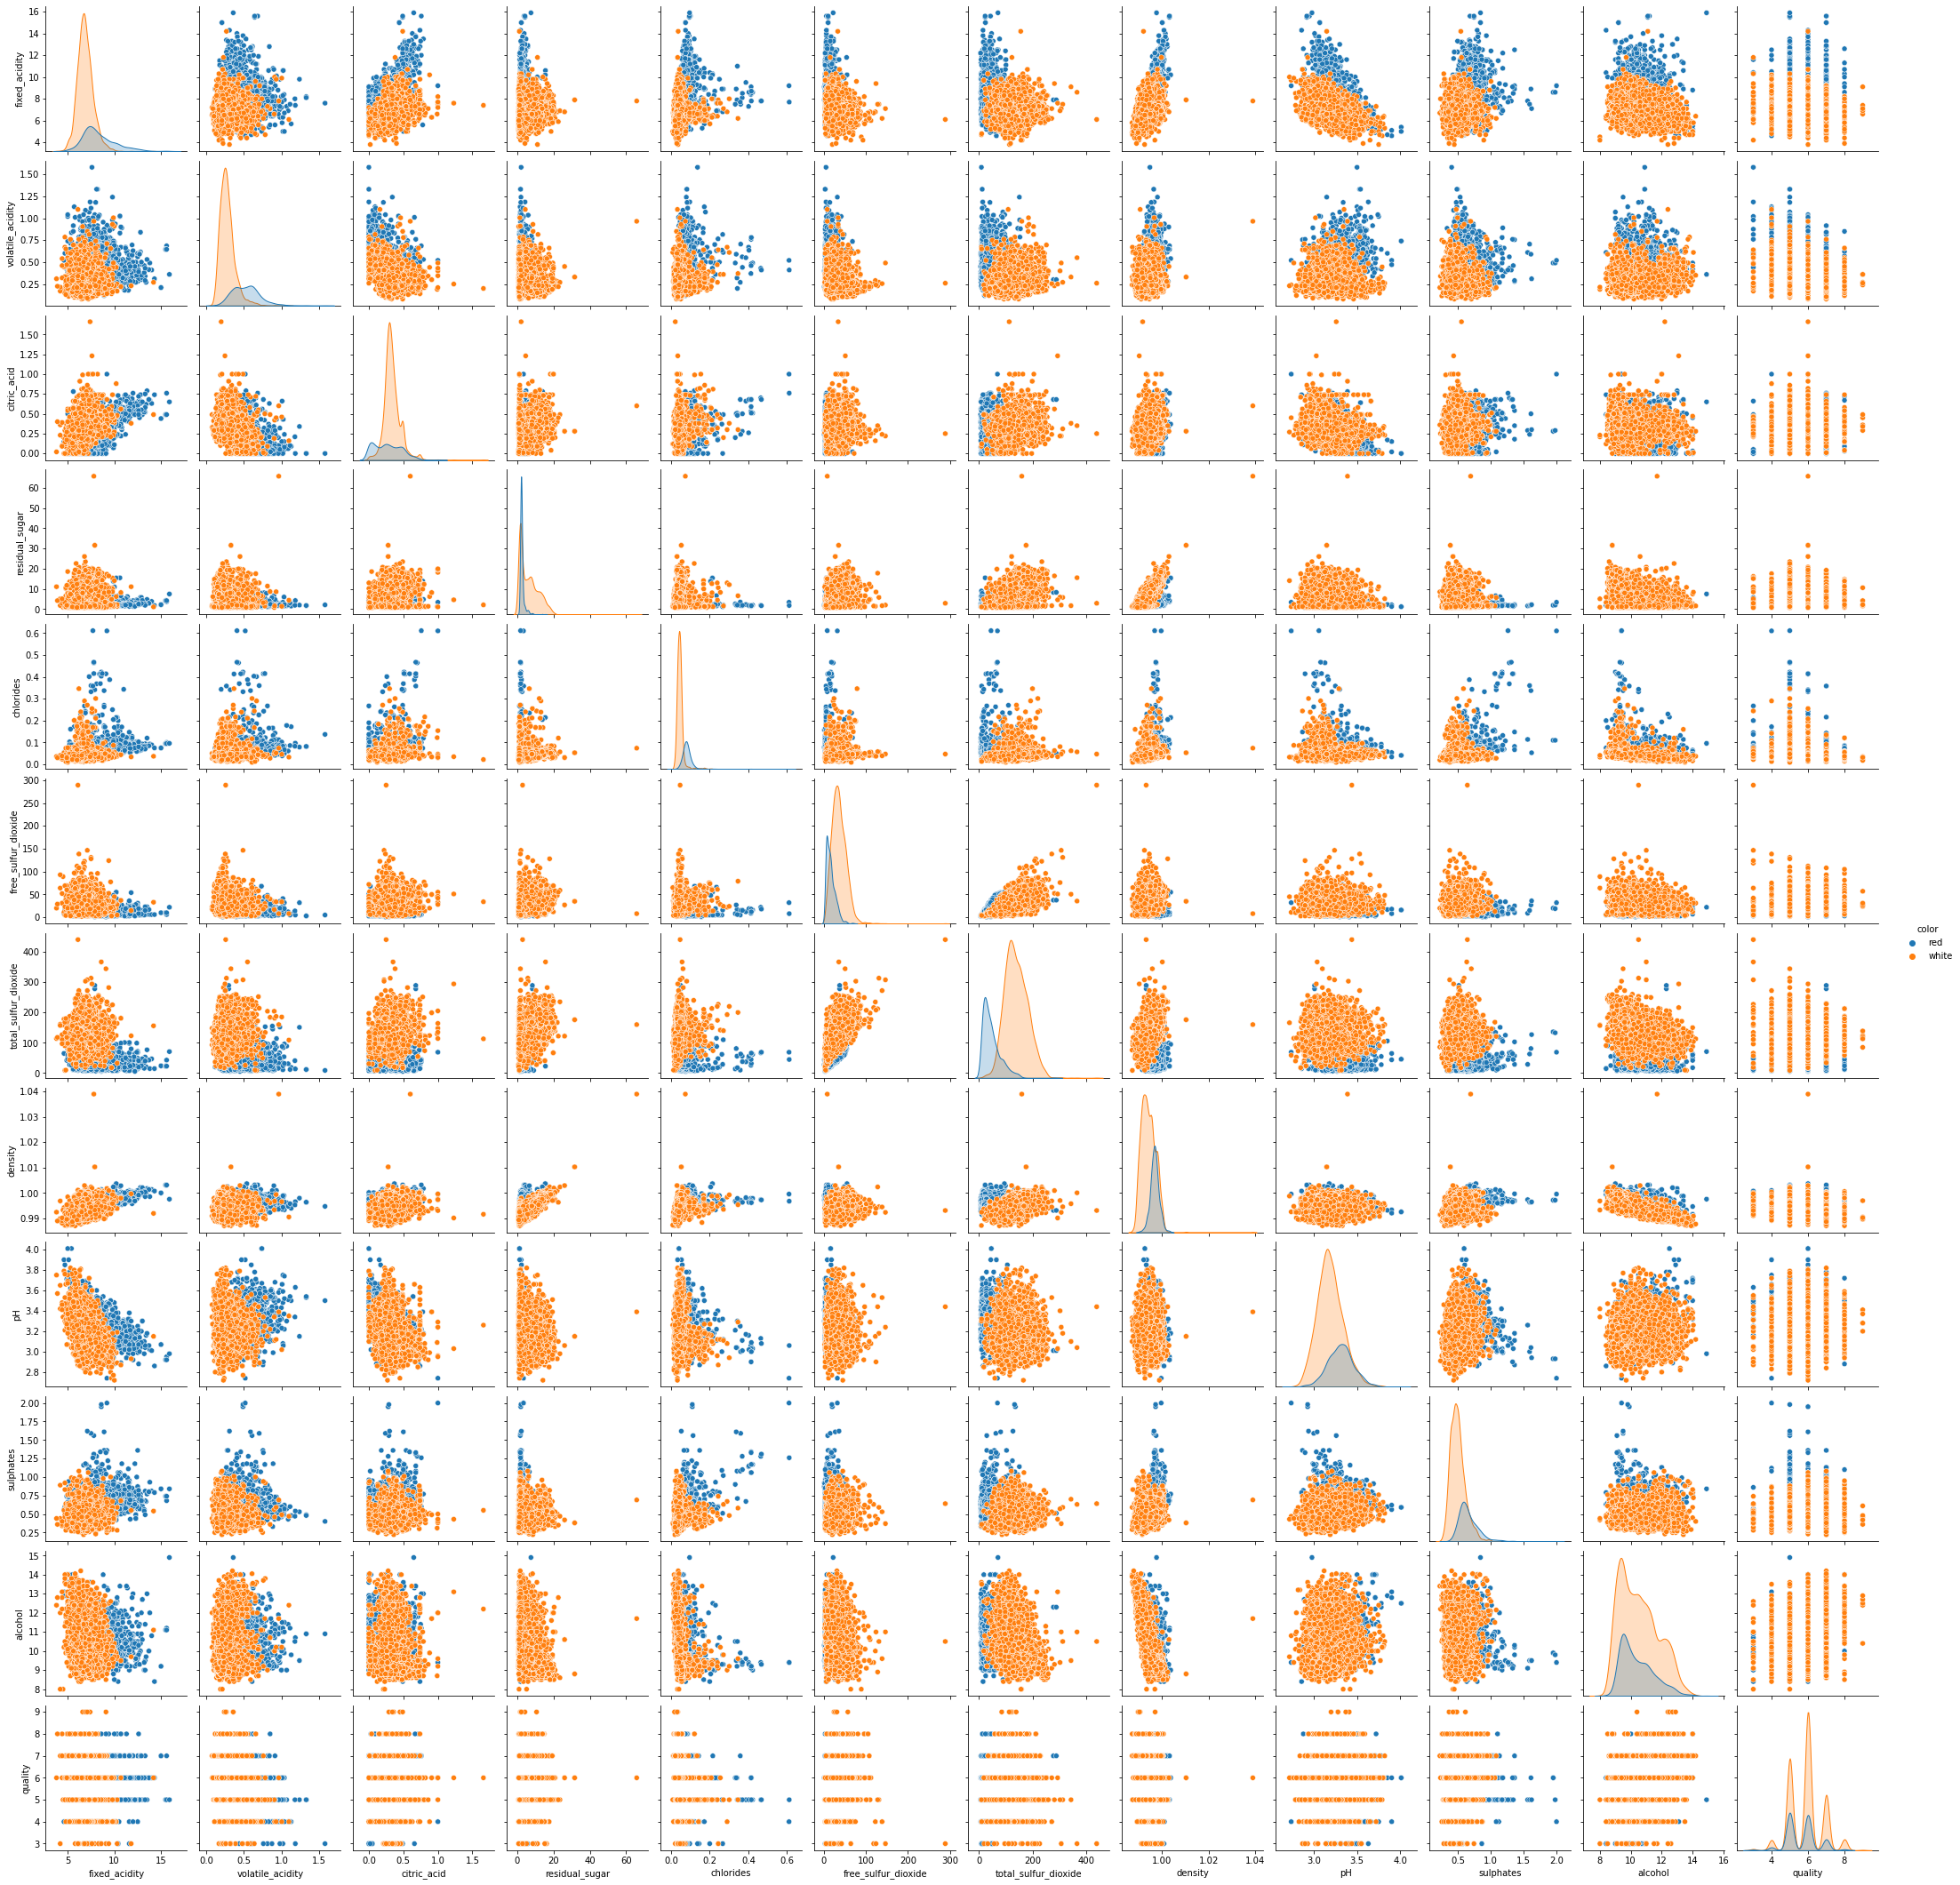

In [11]:
sns.pairplot(data,hue='color')

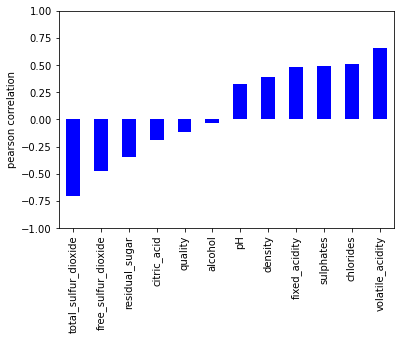

In [18]:
ax=correlations.plot(kind='bar',color='blue')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [ ]:
TypeError: bar() missing 1 required positional argument: 'height'
        4

For bar chart, you need to specify the x-location of all the bars.
The simplest way if you have no explicit x-values is to use a range 0, 1, 2, 3, ... and so on.
So if you have N bars to plot, you can generate N x-values using range() or use labels as the x-argument

In [ ]:
plt.bar(list(s.index),s.value)

<AxesSubplot:>

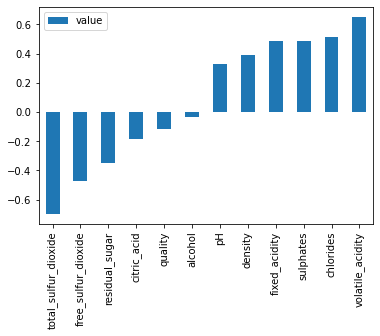

In [108]:
s.plot.bar()

C:\Users\ufukk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='value'>

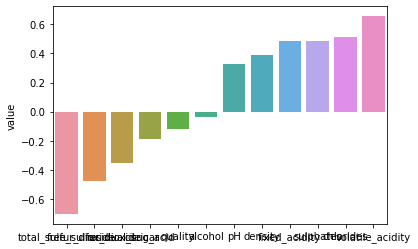

In [99]:
s=pd.DataFrame(data=correlations,columns=["value"])
sns.barplot(s.index,s.value,data=s)

In [134]:
s=abs(s).sort_values(by='value',ascending=False)

In [138]:
fields=s[0:2].index

In [141]:
fields=list(fields)

In [142]:
X=data[fields]

In [143]:
X

,total_sulfur_dioxide,volatile_acidity
0,34.0,0.70
1,67.0,0.88
2,54.0,0.76
3,60.0,0.28
4,34.0,0.70
...,...,...
6492,92.0,0.21
6493,168.0,0.32
6494,111.0,0.24
6495,110.0,0.29


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=['%s_scaled'% fld for fld in fields])
print(X.columns)

Index(['total_sulfur_dioxide_scaled', 'volatile_acidity_scaled'], dtype='object')


## Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.


In [150]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()
lsvc.fit(X,y)

LinearSVC()

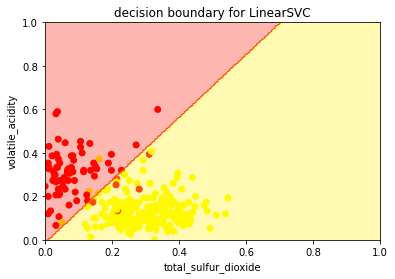

In [151]:
X_color=X.sample(300,random_state=45)
y_color=y.loc[X_color.index]
y_color=y_color.map(lambda r:'red' if r==1 else 'yellow')
ax=plt.axes()
ax.scatter(X_color.iloc[:,0],X_color.iloc[:,1],color=y_color,alpha=1)
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = lsvc.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

## Part 3: Gaussian Kernel

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, the finished function uses the input `estimator` and not the LinearSVC model.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, we plot the decision boundary for various values of `C`: 
`[.1, 1, 10]`

In [153]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

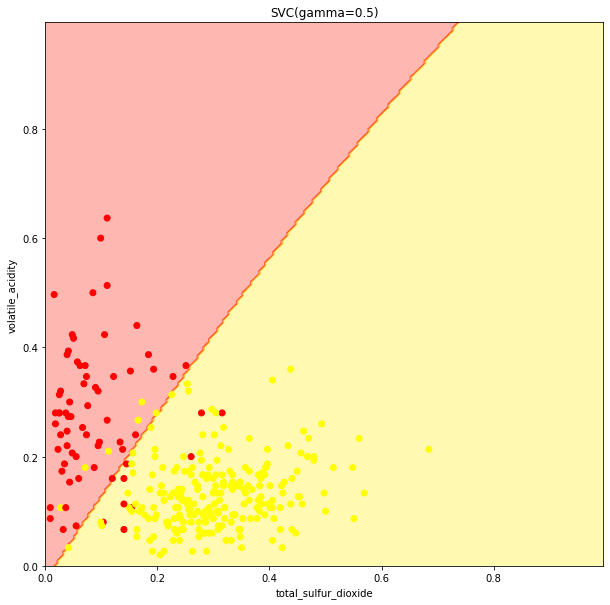

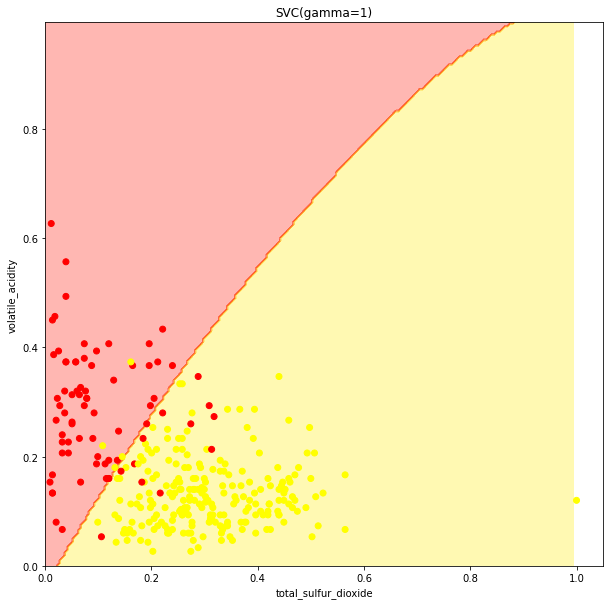

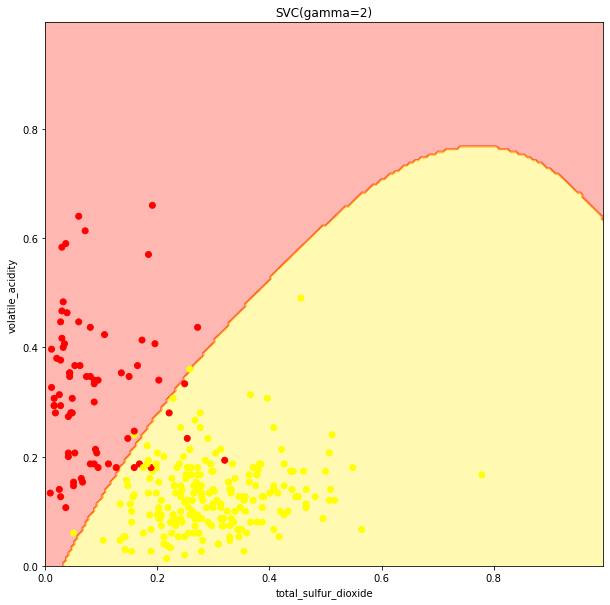

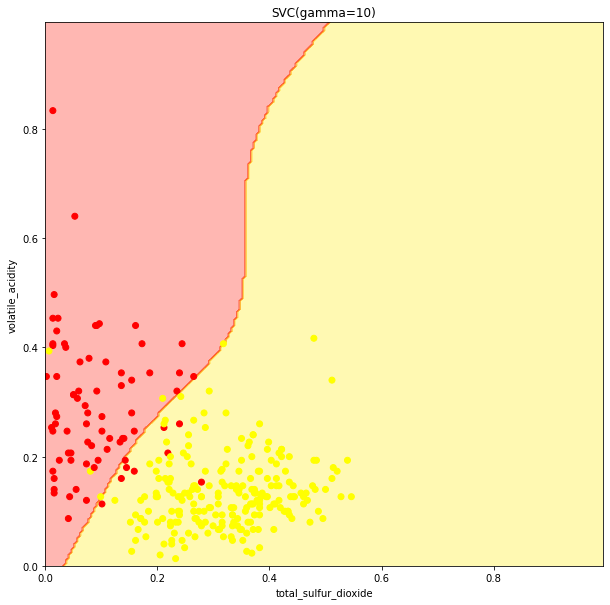

In [154]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

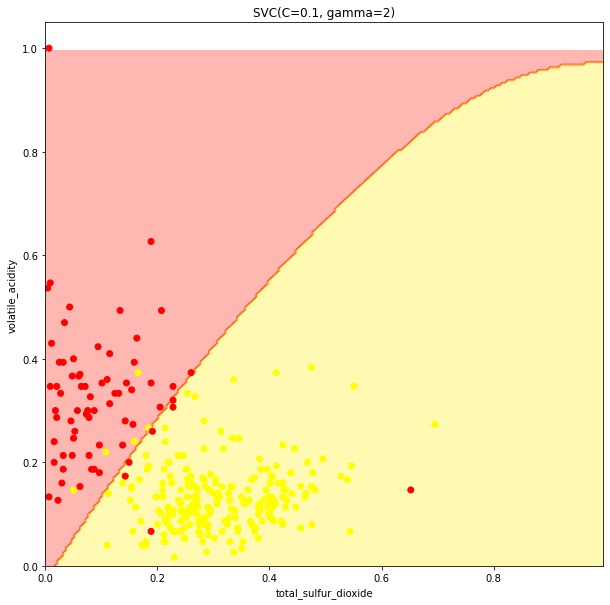

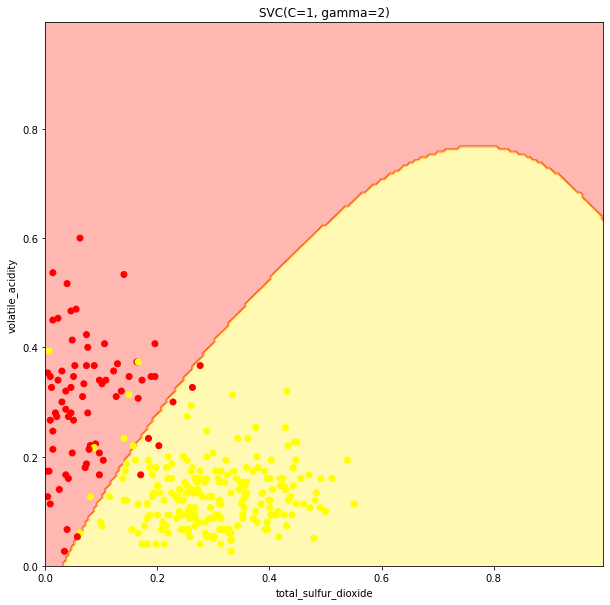

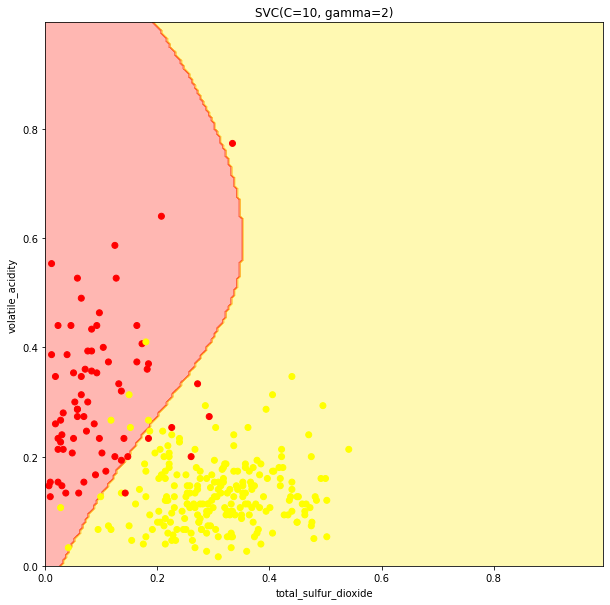

In [155]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

##### Part 4: Comparing Kernel Execution Times

In this exercise, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If we type **`%%timeit`** in the beginning of the cell, it will output the execution time.

We proceed with the following steps:
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [158]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


In [163]:
y=data.color
x=data[data.columns[:-1]]

In [164]:
wargs = {'kernel': 'rbf'}
svc = SVC(**wargs)
nystroem = Nystroem(**wargs)
sgd = SGDClassifier()

In [165]:
%%timeit
svc.fit(X, y)

201 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [166]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

77.4 ms ± 9.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [167]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 2)
(32485,)


In [168]:
%timeit svc.fit(X2, y2)

5.77 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [169]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

247 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
